## Classification Models


In [303]:

#Libraries

from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot


# Pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# model eval, & metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#### import data

In [273]:
filepath_features = Path('../Resources/training_data_features.csv')
filepath_target = Path('../Resources/training_data_target.csv')
features_df = pd.read_csv(filepath_features, index_col=0)
target_df = pd.read_csv(filepath_target, index_col=0)

#### prepare the data

In [274]:
features_df.shape

(11640, 57)

In [275]:
features_df.head()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,game_score
0,19.0,43.0,574.0,5.3,0.440,0.627,0.068,4.2,15.6,9.7,...,0.0,0.000000,0.250000,2.5,2.000000,0.000000,0.25,1.000000,2.0,1.825
1,25.0,67.0,1183.0,10.4,0.531,0.717,0.109,2.1,7.8,4.8,...,0.0,0.000000,0.000000,0.8,0.400000,0.000000,0.00,0.600000,1.4,2.360
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.5,2.000000,0.000000,1.5,1.000000,0.500000,0.00,1.500000,2.0,10.600
3,22.0,82.0,2412.0,17.2,0.520,0.160,0.231,3.9,13.9,8.7,...,2.0,3.333333,0.666667,2.0,7.666667,0.333333,0.00,2.666667,1.0,9.200
4,23.0,66.0,2048.0,15.6,0.539,0.120,0.189,6.5,11.7,9.0,...,2.0,2.600000,1.800000,2.6,1.200000,1.600000,0.60,0.800000,2.4,10.100


In [276]:
features_df.fillna(0, inplace=True)

### model pre-processing 

In [277]:
standard_scaler = StandardScaler()
features_df_scaled = pd.DataFrame(standard_scaler.fit_transform(features_df))
features_df_array = features_df_scaled.to_numpy()

In [278]:
features_df_array = features_df_array.reshape((2328,5,57))

In [279]:
features_df_flatten = features_df_array.reshape((features_df_array.shape[0], features_df_array.shape[1]*features_df_array.shape[2])) # A.shape[0] = a ; A.shape[1] = b ; A.shape[2] = c		


In [280]:
features_df_flatten.shape

(2328, 285)

In [281]:
target_df.head(5)

,game_id,outcomes
0,7400,LOSS
1,7401,LOSS
2,7402,WIN
3,7403,LOSS
4,7404,WIN


In [282]:
target_df['outcomes'] = target_df['outcomes'].str.replace('LOSS','0')
target_df['outcomes'] = target_df['outcomes'].str.replace('WIN','1')
target_df['outcomes'] = target_df['outcomes'].astype('int')
target_df.head(5)

,game_id,outcomes
0,7400,0
1,7401,0
2,7402,1
3,7403,0
4,7404,1


In [283]:
target_df_array = target_df[['outcomes']].to_numpy()

In [284]:
target_df_array.shape

(2328, 1)

In [289]:
target_df_array = np.ravel(target_df_array)
target_df_array.shape

(2328,)

### Create target and features for train and test

In [290]:
split = int(.7*len(features_df_flatten))
split = int(.7*len(target_df_array))
x_train = features_df_flatten[:split]
x_test = features_df_flatten[split:]
y_train = target_df_array[:split]
y_test = target_df_array[split:]

In [291]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1629, 285)
(699, 285)
(1629,)
(699,)


In [292]:
X = x_train
Y = y_train

# Classification Algos

In [293]:
# Classification: Logisitc, LDA, k-nearest neighbors, Naive bayes, & SVM

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
best = -np.inf
best_model = None
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    if cv_results.mean() > best:
        best = cv_results.mean()
        best_model = model
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.613266 (0.023006)


C:\Users\jenni\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jenni\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jenni\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jenni\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jenni\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jenni\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jenni\Anacond

LDA: 0.613879 (0.023248)
KNN: 0.616296 (0.023291)
CART: 0.526043 (0.051360)
NB: 0.632924 (0.030787)
SVM: 0.660528 (0.023919)


### Boxplot algorithm comparison

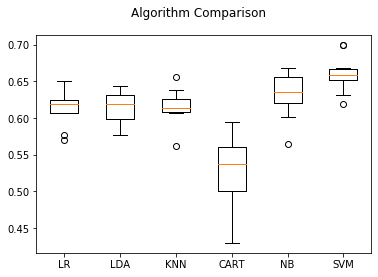

In [294]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Fitting the Best Model

In [295]:
model = best_model
model.fit(X, Y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [296]:
x_test.shape

(699, 285)

### Make Predictions Using the Model from the x test dataset


In [297]:
predictions = model.predict(x_test)

### Model Evaluation

In [298]:
# Print the classification report
results = (classification_report(y_test, predictions))
print("Classification Report")
print(results)

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.38      0.47       314
           1       0.61      0.81      0.70       385

    accuracy                           0.62       699
   macro avg       0.62      0.59      0.58       699
weighted avg       0.62      0.62      0.60       699



In [313]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix")
display(cm_df)
# Calculating the accuracy score
acc_score = round(accuracy_score(y_test, predictions),2)*100

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,152,162
Actual 1,161,224


In [300]:
print(f"Accuracy Score: {acc_score}%")

Accuracy Score: 62.0%
